In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler


## Classifier Without Imbalanced Technique

In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


In [3]:
df.drop(['DiffWalking',"SleepTime"],axis=1,inplace=True)
df.shape
df['HeartDisease'].value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   Sex               319795 non-null  int64  
 8   AgeCategory       319795 non-null  int64  
 9   Race              319795 non-null  int64  
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  Asthma            319795 non-null  int64  
 14  KidneyDisease     319795 non-null  int64  
 15  SkinCancer        319795 non-null  int64  
dtypes: float64(1), int64

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
x = df.drop(["HeartDisease"] , axis = 1).values
y = df["HeartDisease"].values

In [7]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

209849 209849
69950 69950


## scalar

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

209849 209849
69950 69950


## Random Forest

In [9]:



# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train, y_train)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 200,  
    'max_depth': 10,       
    'min_samples_split': 4,   
    'min_samples_leaf': 1,    
    'max_features': 'sqrt'
}

gb_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features']
)
gb_clf.fit(x_train, y_train)

# Predykcje i ocena modelu
ypred_train = gb_clf.predict(x_train)
ypred_test = gb_clf.predict(x_test)

print("Training Results\n")
print(classification_report(y_train, ypred_train))
print("Test Results\n")
print(classification_report(y_test, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(gb_clf, x_train, y_train, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    189636
           1       0.83      0.06      0.11     20213

    accuracy                           0.91    209849
   macro avg       0.87      0.53      0.53    209849
weighted avg       0.90      0.91      0.87    209849

Test Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63225
           1       0.62      0.04      0.08      6725

    accuracy                           0.91     69950
   macro avg       0.76      0.52      0.51     69950
weighted avg       0.88      0.91      0.87     69950

Confusion Matrix:
 [[63057   168]
 [ 6454   271]]
Cross-validation scores: [0.90478914 0.90493209 0.90505123 0.90481296 0.90500131]
Average cross-validation score: 0.9049173457293804


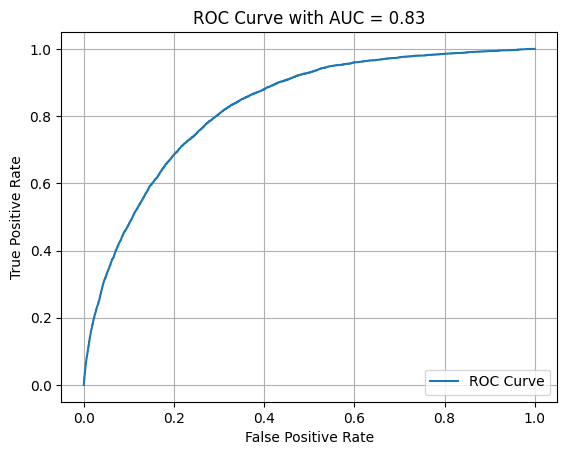

In [10]:

y_proba_test = gb_clf.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:


# # Parametry do przetestowania w Grid Search
# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train, y_train)

params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'criterion': 'gini'
}

best_tree = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion']
)
best_tree.fit(x_train, y_train)

ypred_train2 = best_tree.predict(x_train)
ypred_test2 = best_tree.predict(x_test)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train, y_train, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    189636
           1       0.58      0.05      0.09     20213

    accuracy                           0.91    209849
   macro avg       0.74      0.52      0.52    209849
weighted avg       0.88      0.91      0.87    209849

Testing Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63225
           1       0.59      0.05      0.09      6725

    accuracy                           0.91     69950
   macro avg       0.75      0.52      0.52     69950
weighted avg       0.88      0.91      0.87     69950

Cross-Validation Scores for the Best Model: [0.90464618 0.90469383 0.90509888 0.90514653 0.90452477]
Average Cross-Validation Score: 0.9048220372874353


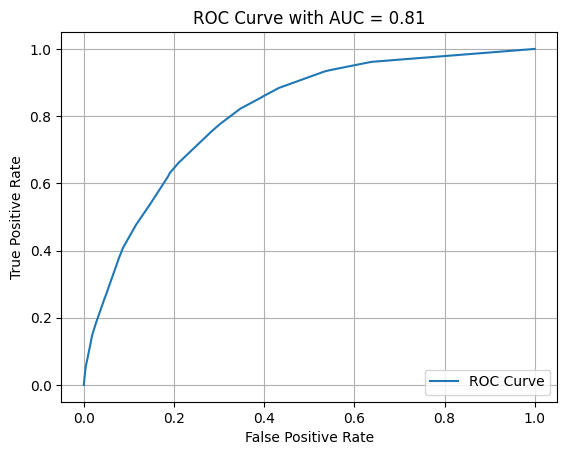

In [12]:

y_proba_test = best_tree.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train, y_train)
ypred_train3 = Gnb.predict(x_train)
y_pred_test3 = Gnb.predict(x_test)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.8456182987848463


In [14]:
print("Training Results\n")
print(classification_report(y_train, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.94      0.89      0.91    189636
           1       0.29      0.43      0.35     20213

    accuracy                           0.84    209849
   macro avg       0.61      0.66      0.63    209849
weighted avg       0.87      0.84      0.86    209849



In [15]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     63225
           1       0.30      0.44      0.35      6725

    accuracy                           0.85     69950
   macro avg       0.62      0.66      0.63     69950
weighted avg       0.88      0.85      0.86     69950



Cross-Validation Scores for the Best Model: [0.84267334 0.84410293 0.84086252 0.84519895 0.84512378]
Average Cross-Validation Score: 0.8435923046165443


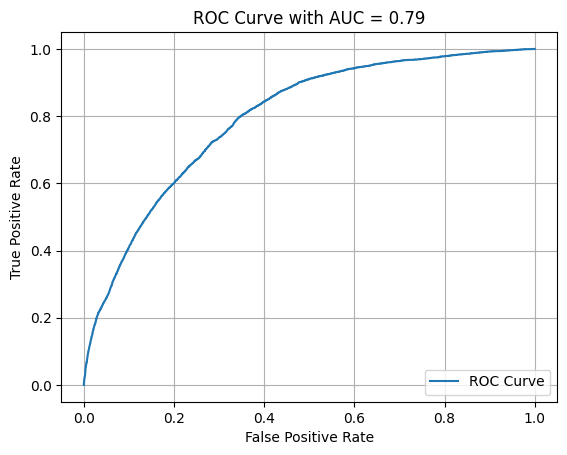

In [16]:
cross_val_scores = cross_val_score(Gnb, x_train, y_train, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())


y_proba_test = Gnb.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Accuracy on Training set:  0.9059561875443771
Accuracy on Test set:  0.9061615439599714

Training Results

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    189636
           1       0.58      0.09      0.15     20213

    accuracy                           0.91    209849
   macro avg       0.75      0.54      0.55    209849
weighted avg       0.88      0.91      0.87    209849

Testing Results

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     63225
           1       0.58      0.09      0.15      6725

    accuracy                           0.91     69950
   macro avg       0.75      0.54      0.55     69950
weighted avg       0.88      0.91      0.87     69950

Cross-Validation Scores for the Best Model: [0.90521801 0.90555158 0.9054801  0.90614725 0.90450094]
Average Cross-Validation Score: 0.9053795782746781


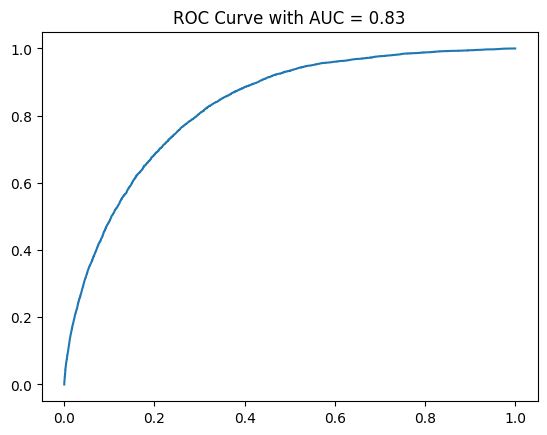

In [17]:



# # Inicjalizacja modelu XGBoost
# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train, y_train)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 50,
    'max_depth': 3,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.7
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree']
)
best_xg.fit(x_train, y_train)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train)
y_pred_test4 = best_xg.predict(x_test)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test4))


cross_val_scores = cross_val_score(best_xg, x_train, y_train, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())
# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.9052032652049807
Accuracy on Test set:  0.9060042887776983

Training Results

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    189636
           1       0.56      0.08      0.13     20213

    accuracy                           0.91    209849
   macro avg       0.73      0.54      0.54    209849
weighted avg       0.88      0.91      0.87    209849

Testing Results

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     63225
           1       0.58      0.08      0.14      6725

    accuracy                           0.91     69950
   macro avg       0.74      0.54      0.55     69950
weighted avg       0.88      0.91      0.87     69950

Cross-Validation Scores for the Best Model: [0.90495592 0.90550393 0.90488444 0.9057422  0.90514427]
Average Cross-Validation Score: 0.905246152700849


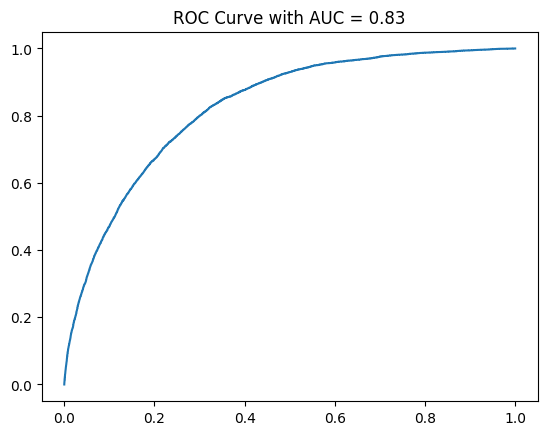

In [18]:




# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train, y_train)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.01,
    'penalty': 'l2',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver']
)

best_lg.fit(x_train, y_train)


# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train)
y_pred_test4 = best_lg.predict(x_test)
# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test4))

cross_val_scores = cross_val_score(best_lg, x_train, y_train, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())
# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Accuracy on Training set:  0.9061944541074772
Accuracy on Test set:  0.90590421729807

Training Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    189636
           1       0.64      0.06      0.11     20213

    accuracy                           0.91    209849
   macro avg       0.77      0.53      0.53    209849
weighted avg       0.88      0.91      0.87    209849

Testing Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63225
           1       0.61      0.06      0.11      6725

    accuracy                           0.91     69950
   macro avg       0.76      0.53      0.53     69950
weighted avg       0.88      0.91      0.87     69950

Cross-Validation Scores for the Best Model: [0.90526567 0.90519419 0.90533715 0.9053848  0.90476304]
Average Cross-Validation Score: 0.9051889671815078


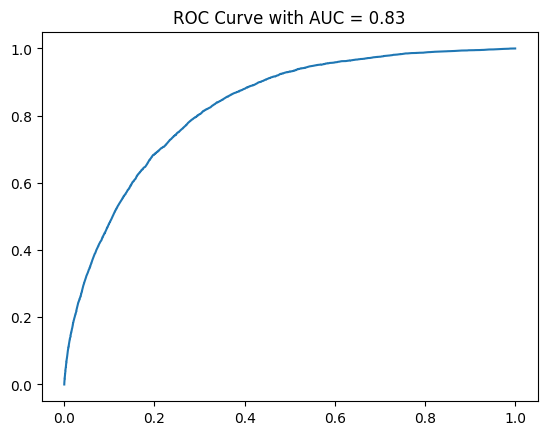

In [19]:



# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train, y_train)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_

params = {
    'n_estimators': 300,
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf']
)
best_gb.fit(x_train, y_train)

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train)
y_pred_test6 = best_gb.predict(x_test)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test6))


cross_val_scores = cross_val_score(best_gb, x_train, y_train, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train, 
            y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.2283645528395545

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [25]:
ypred_train = grid_cv.predict(x_train)
y_pred_test = grid_cv.predict(x_test)
print("XGBClassifier Accuracy: ",accuracy_score(y_test, y_pred_test))

XGBClassifier Accuracy:  0.8502215868477484


In [26]:
print("Training Results\n")
print(classification_report(y_train, ypred_train))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    189636
           1       0.96      0.97      0.96     20213

    accuracy                           0.99    209849
   macro avg       0.98      0.98      0.98    209849
weighted avg       0.99      0.99      0.99    209849



In [27]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test))

Testing Results

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     63225
           1       0.23      0.23      0.23      6725

    accuracy                           0.85     69950
   macro avg       0.57      0.57      0.57     69950
weighted avg       0.85      0.85      0.85     69950



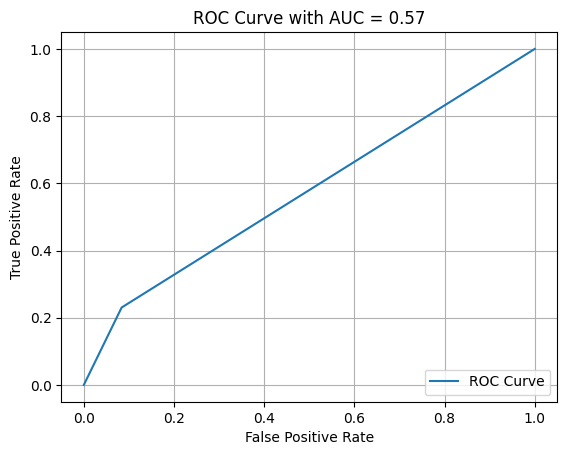

In [28]:

# cross_val_scores = cross_val_score(grid_cv, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = grid_cv.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train, y_train, batch_size = 32, epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


6558/6558 [==============================] - 51s 6ms/step - loss: 0.2613 - accuracy: 0.9049 - val_loss: 0.2516 - val_accuracy: 0.9058
Epoch 2/100
6558/6558 [==============================] - 34s 5ms/step - loss: 0.2500 - accuracy: 0.9051 - val_loss: 0.2541 - val_accuracy: 0.9050
Epoch 3/100
6558/6558 [==============================] - 31s 5ms/step - loss: 0.2492 - accuracy: 0.9053 - val_loss: 0.2517 - val_accuracy: 0.9060
Epoch 4/100
6558/6558 [==============================] - 33s 5ms/step - loss: 0.2490 - accuracy: 0.9057 - val_loss: 0.2502 - val_accuracy: 0.9058
Epoch 5/100
6558/6558 [==============================] - 29s 4ms/step - loss: 0.2486 - accuracy: 0.9054 - val_loss: 0.2502 - val_accuracy: 0.9060
Epoch 6/100
6558/6558 [==============================] - 33s 5ms/step - loss: 0.2484 - accuracy: 0.9055 - val_loss: 0.2495 - val_accuracy: 0.9062
Epoch 7/100
6558/6558 [==============================] - 35s 5ms/step - loss: 0.2481 - accuracy: 0.9056 - val_loss: 0.2493

6558/6558 [==============================] - 34s 5ms/step - loss: 0.2468 - accuracy: 0.9057 - val_loss: 0.2489 - val_accuracy: 0.9062
Epoch 27/100
6558/6558 [==============================] - 31s 5ms/step - loss: 0.2469 - accuracy: 0.9056 - val_loss: 0.2487 - val_accuracy: 0.9060
Epoch 28/100
6558/6558 [==============================] - 30s 5ms/step - loss: 0.2469 - accuracy: 0.9058 - val_loss: 0.2488 - val_accuracy: 0.9062
Epoch 29/100
6558/6558 [==============================] - 39s 6ms/step - loss: 0.2468 - accuracy: 0.9057 - val_loss: 0.2490 - val_accuracy: 0.9061
Epoch 30/100
6558/6558 [==============================] - 49s 8ms/step - loss: 0.2469 - accuracy: 0.9058 - val_loss: 0.2484 - val_accuracy: 0.9062
Epoch 31/100
6558/6558 [==============================] - 48s 7ms/step - loss: 0.2468 - accuracy: 0.9056 - val_loss: 0.2487 - val_accuracy: 0.9060
Epoch 32/100
6558/6558 [==============================] - 51s 8ms/step - loss: 0.2467 - accuracy: 0.9056 - val_loss: 0.2486 - val_a

In [36]:
ypred_train6 = ann.predict(x_train)
y_pred_test6 = ann.predict(x_test)

y_pred_test6 = (y_pred_test6 > 0.5)
ypred_train6 = (ypred_train6 > 0.5)
print(np.concatenate((y_pred_test6.reshape(len(y_pred_test6),1), y_test.reshape(len(y_test),1)),1))

2186/2186 [==============================] - 9s 4ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [37]:
accuracy_score(y_test, y_pred_test6)

0.9058899213724089

In [38]:
print("Training Results\n")
print(classification_report(y_train, ypred_train6))

Training Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    189636
           1       0.60      0.07      0.12     20213

    accuracy                           0.91    209849
   macro avg       0.75      0.53      0.54    209849
weighted avg       0.88      0.91      0.87    209849



In [39]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test6))

Testing Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63225
           1       0.59      0.07      0.12      6725

    accuracy                           0.91     69950
   macro avg       0.75      0.53      0.53     69950
weighted avg       0.88      0.91      0.87     69950



2186/2186 [==============================] - 9s 4ms/step


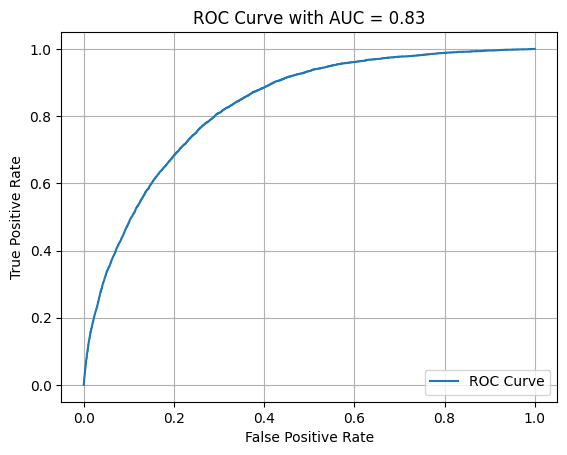

In [40]:
# cross_val_scores = cross_val_score(ann, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = ann.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train,y_train,epochs = 100)

Epoch 1/100
6558/6558 [==============================] - 42s 5ms/step - loss: 0.2608 - accuracy: 0.9037
Epoch 2/100
6558/6558 [==============================] - 41s 6ms/step - loss: 0.2501 - accuracy: 0.9037
Epoch 3/100
6558/6558 [==============================] - 33s 5ms/step - loss: 0.2494 - accuracy: 0.9045
Epoch 4/100
6558/6558 [==============================] - 36s 6ms/step - loss: 0.2491 - accuracy: 0.9053
Epoch 5/100
6558/6558 [==============================] - 41s 6ms/step - loss: 0.2488 - accuracy: 0.9054
Epoch 6/100
6558/6558 [==============================] - 44s 7ms/step - loss: 0.2484 - accuracy: 0.9055
Epoch 7/100
6558/6558 [==============================] - 44s 7ms/step - loss: 0.2484 - accuracy: 0.9053
Epoch 8/100
6558/6558 [==============================] - 42s 6ms/step - loss: 0.2482 - accuracy: 0.9053
Epoch 9/100
6558/6558 [==============================] - 36s 6ms/step - loss: 0.2480 - accuracy: 0.9053
Epoch 10/100
6558/6558 [==============================] - 42s 6m

6558/6558 [==============================] - 41s 6ms/step - loss: 0.2472 - accuracy: 0.9058
Epoch 36/100
6558/6558 [==============================] - 51s 8ms/step - loss: 0.2471 - accuracy: 0.9056
Epoch 37/100
6558/6558 [==============================] - 40s 6ms/step - loss: 0.2471 - accuracy: 0.9057
Epoch 38/100
6558/6558 [==============================] - 41s 6ms/step - loss: 0.2472 - accuracy: 0.9056
Epoch 39/100
6558/6558 [==============================] - 44s 7ms/step - loss: 0.2471 - accuracy: 0.9057
Epoch 40/100
6558/6558 [==============================] - 39s 6ms/step - loss: 0.2471 - accuracy: 0.9058
Epoch 41/100
6558/6558 [==============================] - 41s 6ms/step - loss: 0.2470 - accuracy: 0.9058
Epoch 42/100
6558/6558 [==============================] - 40s 6ms/step - loss: 0.2472 - accuracy: 0.9057
Epoch 43/100
6558/6558 [==============================] - 43s 7ms/step - loss: 0.2471 - accuracy: 0.9057
Epoch 44/100
6558/6558 [==============================] - 38s 6ms/st

In [42]:
model_2.evaluate(x_test,y_test)

2186/2186 [==============================] - 7s 3ms/step - loss: 0.2488 - accuracy: 0.9062


[0.2488306313753128, 0.9061615467071533]

In [43]:
ypred_train91 = model_2.predict(x_train)
y_pred_test91 = model_2.predict(x_test)

y_pred_test91 = (y_pred_test91 > 0.5)
ypred_train91 = (ypred_train91 > 0.5)

print(classification_report(y_train,ypred_train91))
print(classification_report(y_test,y_pred_test91))

2107/2186 [===========================>..] - ETA: 0s

2186/2186 [==============================] - 10s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    189636
           1       0.57      0.09      0.15     20213

    accuracy                           0.91    209849
   macro avg       0.74      0.54      0.55    209849
weighted avg       0.88      0.91      0.87    209849

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     63225
           1       0.57      0.09      0.16      6725

    accuracy                           0.91     69950
   macro avg       0.74      0.54      0.56     69950
weighted avg       0.88      0.91      0.87     69950



1520/2186 [===================>..........] - ETA: 2s

2186/2186 [==============================] - 9s 4ms/step


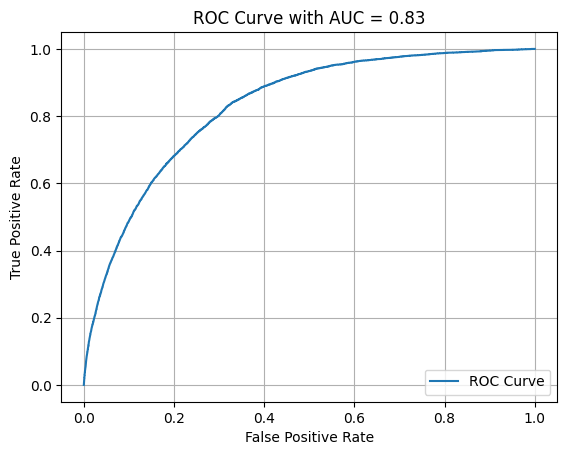

In [44]:
# cross_val_scores = cross_val_score(model_2, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model_2.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [45]:
model1 = Sequential()
model1.add(Dense(units=16,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
model1.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100


6558/6558 [==============================] - 41s 6ms/step - loss: 0.3017 - val_loss: 0.2589
Epoch 2/100
6558/6558 [==============================] - 41s 6ms/step - loss: 0.2682 - val_loss: 0.2558
Epoch 3/100
6558/6558 [==============================] - 40s 6ms/step - loss: 0.2656 - val_loss: 0.2554
Epoch 4/100
6558/6558 [==============================] - 42s 6ms/step - loss: 0.2640 - val_loss: 0.2549
Epoch 5/100
6558/6558 [==============================] - 41s 6ms/step - loss: 0.2633 - val_loss: 0.2548
Epoch 6/100
6558/6558 [==============================] - 37s 6ms/step - loss: 0.2626 - val_loss: 0.2545
Epoch 7/100
6558/6558 [==============================] - 38s 6ms/step - loss: 0.2626 - val_loss: 0.2543
Epoch 8/100
6558/6558 [==============================] - 31s 5ms/step - loss: 0.2630 - val_loss: 0.2540
Epoch 9/100
6558/6558 [==============================] - 30s 5ms/step - loss: 0.2622 - val_loss: 0.2547
Epoch 10/100
6558/6558 [==============================] - 30s 5ms/step - los

In [47]:
ypred_train11 = model1.predict(x_train)
y_pred_test11 = model1.predict(x_test)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train,ypred_train11))
print(classification_report(y_test,y_pred_test11))

2186/2186 [==============================] - 9s 3ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    189636
           1       0.00      0.00      0.00     20213

    accuracy                           0.90    209849
   macro avg       0.45      0.50      0.47    209849
weighted avg       0.82      0.90      0.86    209849

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     63225
           1       0.00      0.00      0.00      6725

    accuracy                           0.90     69950
   macro avg       0.45      0.50      0.47     69950
weighted avg       0.82      0.90      0.86     69950



2186/2186 [==============================] - 10s 3ms/step


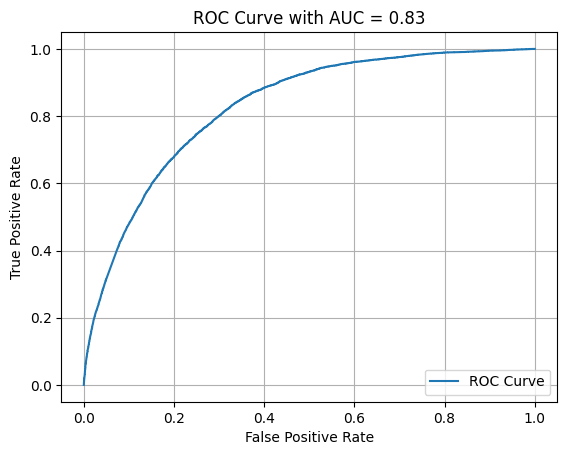

In [48]:
# cross_val_scores = cross_val_score(model1, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model1.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [49]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train,y_train,epochs = 100)

Epoch 1/100
6558/6558 [==============================] - 35s 5ms/step - loss: 0.2603 - accuracy: 0.9036
Epoch 2/100
6558/6558 [==============================] - 31s 5ms/step - loss: 0.2498 - accuracy: 0.9051
Epoch 3/100
6558/6558 [==============================] - 31s 5ms/step - loss: 0.2492 - accuracy: 0.9054
Epoch 4/100
6558/6558 [==============================] - 35s 5ms/step - loss: 0.2489 - accuracy: 0.9055
Epoch 5/100
6558/6558 [==============================] - 35s 5ms/step - loss: 0.2487 - accuracy: 0.9055
Epoch 6/100
6558/6558 [==============================] - 34s 5ms/step - loss: 0.2484 - accuracy: 0.9056
Epoch 7/100
6558/6558 [==============================] - 34s 5ms/step - loss: 0.2484 - accuracy: 0.9054
Epoch 8/100
6558/6558 [==============================] - 32s 5ms/step - loss: 0.2482 - accuracy: 0.9056
Epoch 9/100
6558/6558 [==============================] - 30s 5ms/step - loss: 0.2480 - accuracy: 0.9056
Epoch 10/100
6558/6558 [==============================] - 30s 5m

In [50]:
model_22.evaluate(x_test,y_test)

2186/2186 [==============================] - 12s 5ms/step - loss: 0.2504 - accuracy: 0.9057


[0.25042328238487244, 0.90567547082901]

In [51]:
ypred_train91 = model_22.predict(x_train)
y_pred_test91 = model_22.predict(x_test)

y_pred_test91 = (y_pred_test91 > 0.5)
ypred_train91 = (ypred_train91 > 0.5)

print(classification_report(y_train,ypred_train91))
print(classification_report(y_test,y_pred_test91))

2186/2186 [==============================] - 10s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    189636
           1       0.60      0.08      0.15     20213

    accuracy                           0.91    209849
   macro avg       0.76      0.54      0.55    209849
weighted avg       0.88      0.91      0.87    209849

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     63225
           1       0.57      0.08      0.14      6725

    accuracy                           0.91     69950
   macro avg       0.74      0.54      0.54     69950
weighted avg       0.88      0.91      0.87     69950



2186/2186 [==============================] - 11s 5ms/step


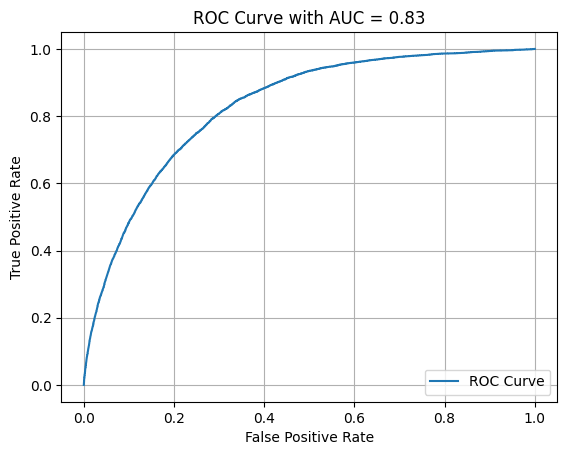

In [52]:
# cross_val_scores = cross_val_score(model_22, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model_22.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model12 = Sequential()



model12.add(Dense(16,  activation='relu'))
model12.add(Dropout(0.2))

model12.add(Dense(10, activation='relu'))
model12.add(Dropout(0.2))

model12.add(Dense(units=1,activation='sigmoid'))

model12.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model12.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
6558/6558 [==============================] - 52s 7ms/step - loss: 0.2748 - val_loss: 0.2529
Epoch 2/100
6558/6558 [==============================] - 48s 7ms/step - loss: 0.2570 - val_loss: 0.2511
Epoch 3/100
6558/6558 [==============================] - 46s 7ms/step - loss: 0.2549 - val_loss: 0.2503
Epoch 4/100
6558/6558 [==============================] - 44s 7ms/step - loss: 0.2536 - val_loss: 0.2507
Epoch 5/100
6558/6558 [==============================] - 45s 7ms/step - loss: 0.2535 - val_loss: 0.2509
Epoch 6/100
6558/6558 [==============================] - 46s 7ms/step - loss: 0.2532 - val_loss: 0.2512
Epoch 7/100
6558/6558 [==============================] - 49s 8ms/step - loss: 0.2525 - val_loss: 0.2499
Epoch 8/100
6558/6558 [==============================] - 45s 7ms/step - loss: 0.2529 - val_loss: 0.2502
Epoch 9/100
6558/6558 [==============================] - 45s 7ms/step - loss: 0.2527 - val_loss: 0.2499
Epoch 10/100
6558/6558 [==============================] - 44s 7m

In [55]:
ypred_train12 = model12.predict(x_train)
y_pred_test12 = model12.predict(x_test)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train,ypred_train12))
print(classification_report(y_test,y_pred_test12))

2186/2186 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    189636
           1       0.73      0.01      0.03     20213

    accuracy                           0.90    209849
   macro avg       0.82      0.51      0.49    209849
weighted avg       0.89      0.90      0.86    209849

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     63225
           1       0.69      0.01      0.02      6725

    accuracy                           0.90     69950
   macro avg       0.80      0.51      0.49     69950
weighted avg       0.88      0.90      0.86     69950



  20/2186 [..............................] - ETA: 6s  

2186/2186 [==============================] - 5s 2ms/step


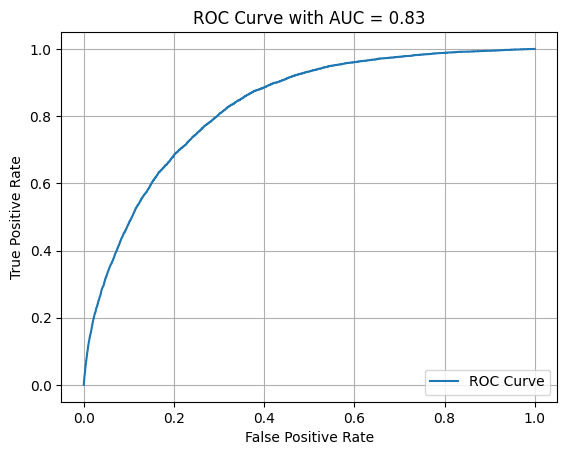

In [56]:
# cross_val_scores = cross_val_score(model12, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model12.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
# model3 = SVC(probability=True)

In [58]:
# model3.fit(x_train,y_train)

In [59]:
# ypred_train14 = model3.predict(x_train)
# y_pred_test14 = model3.predict(x_test)


# print(classification_report(y_train,ypred_train14))
# print(classification_report(y_test,y_pred_test14))

In [60]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
# grid.fit(x_train,y_train) 

In [63]:
# grid.best_params_

In [64]:
# grid.best_estimator_

In [65]:
# ypred_train = grid.predict(x_train)
# y_pred_test = grid.predict(x_test)

# print(classification_report(y_train,ypred_train))
# print(classification_report(y_test,y_pred_test))

In [66]:



# y_proba_test = grid.predict_proba(x_test)[:, 1]


# fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

Training Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    189636
           1       0.70      0.02      0.04     20213

    accuracy                           0.90    209849
   macro avg       0.80      0.51      0.50    209849
weighted avg       0.89      0.90      0.86    209849

Testing Results

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63225
           1       0.62      0.02      0.04      6725

    accuracy                           0.90     69950
   macro avg       0.77      0.51      0.49     69950
weighted avg       0.88      0.90      0.86     69950



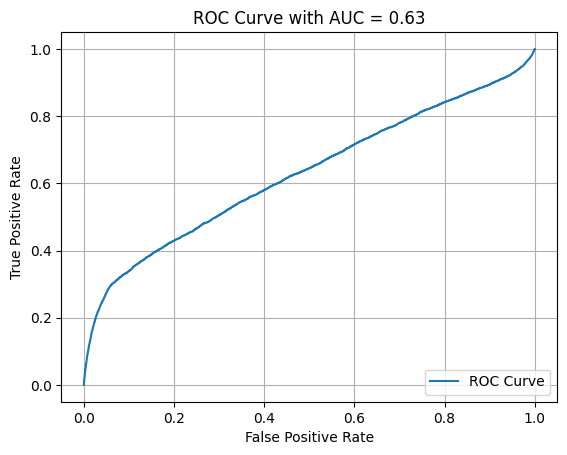

In [67]:

model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train, y_train)


ypred_train14 = model3.predict(x_train)
y_pred_test14 = model3.predict(x_test)


print("Training Results\n")
print(classification_report(y_train, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model3.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()